### In this sheet, we'll be following the cheatsheet
### The file will be people.txt


In [3]:
import sys
sys.version
print("MAKE SURE YOU'RE USING 3.11!!!")

MAKE SURE YOU'RE USING 3.11!!!


<Axes: ylabel='Frequency'>

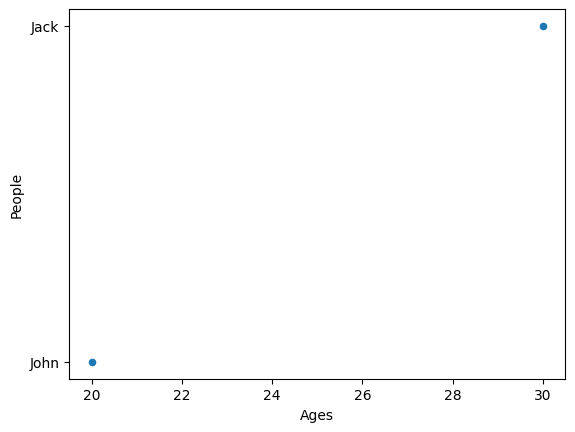

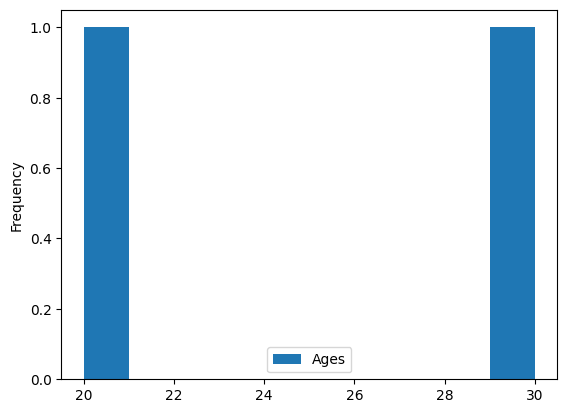

In [2]:
#pandas testing and intellisense testing lmao
import pandas as pd
df_pandas = pd.DataFrame({
    "People": ["John", "Jack"],
    "Ages": [20, 30]
})

df_pandas.plot(kind="scatter", x="Ages", y="People")
df_pandas.plot.hist()

In [3]:
#Non Master-Node Setup (Local Setup)

from pyspark.sql import SparkSession

# Spark session & context
spark = SparkSession.builder.master("local").getOrCreate()
sc = spark.sparkContext

In [3]:

#Alternative - Master-Node Setup - works April 27 2023

#? findspark doesn't seem required??
import findspark
findspark.init('C:\BigDataLocalSetup\spark')


#! OLD SYNTAX
# from pyspark import SparkConf
# from pyspark import SparkContext

# conf = SparkConf()
# conf.setMaster('spark://10.5.0.2:7077')
# conf.setAppName('spark-basic')
# sc = SparkContext(conf=conf)


#? New Syntax!

from pyspark.sql import SparkSession

spark = SparkSession.builder \
                    .master('spark://10.5.0.2:7077') \
                    .appName('Vlad is cool') \
                    .getOrCreate()




### Load a CSV and give it column names whoaaa

In [4]:
#rdd = spark.sparkContext.textFile(r'/home/jovyan/work/people.txt')

#rdd = sc.textFile(r'people.txt')
# rdd = spark.sparkContext.textFile(r'H:\My Drive\Data Analyst Prep\!Programming Files\Python Projects\PySpark Notebooks\people.txt')


# # Extract the column names from the first line
# header = rdd.first().split(",")

# # Remove the header line from the RDD
# data = rdd.filter(lambda line: line != header)

# # Convert the RDD to a DataFrame
# df = data.map(lambda line: line.split(",")).toDF(header)


#df = spark.read.csv("./test1.csv", header=True, inferSchema=True)



df = spark.read.csv("./people.txt", header=True, inferSchema=True)

# Show the DataFrame
df.show(5)


+-------------+---+---------+--------+-----------+
|      address|age|firstName|lastName|phoneNumber|
+-------------+---+---------+--------+-----------+
|  123 Main St| 25|     John|   Smith|   555-1234|
|  456 Oak Ave| 35|     Jane|     Doe|   555-5678|
|  789 Pine St| 42|      Bob| Johnson|   555-9012|
|   321 Elm St| 29|     Mary|   Jones|   555-3456|
|987 Cherry Ln| 47|    Steve|   Brown|   555-7890|
+-------------+---+---------+--------+-----------+
only showing top 5 rows



In [4]:
df.show()

+-------------+---+-----------+--------+-----------+
|      address|age|  firstName|lastName|phoneNumber|
+-------------+---+-----------+--------+-----------+
|  123 Main St| 25|       John|   Smith|   555-1234|
|  456 Oak Ave| 35|       Jane|     Doe|   555-5678|
|  789 Pine St| 42|        Bob| Johnson|   555-9012|
|   321 Elm St| 29|       Mary|   Jones|   555-3456|
|987 Cherry Ln| 47|      Steve|   Brown|   555-7890|
|654 Maple Ave| 31|       Sara|  Miller|   555-2345|
|  321 Pine St| 38|      David| Roberts|   555-6789|
|   456 Oak St| 22|      Kelly|Williams|   555-0123|
|  123 Elm Ave| 55|      James| Johnson|   555-4567|
| 789 Maple St| 27|      Emily|     Lee|   555-8901|
|654 Cherry Ln| 41|       Ryan|  Wilson|   555-2345|
|  987 Main St| 33|        Amy|   Lewis|   555-6789|
|  321 Oak Ave| 48|     Andrew|   Green|   555-0123|
|  456 Pine St| 26|   Michelle|  Carter|   555-4567|
|   789 Elm St| 36|      Jason|Phillips|   555-8901|
|  654 Main St| 50|  Stephanie|Campbell|   555

In [5]:
#Filter by age
df.filter(df["age"]>40).show()

+-------------+---+---------+--------+-----------+
|      address|age|firstName|lastName|phoneNumber|
+-------------+---+---------+--------+-----------+
|  789 Pine St| 42|      Bob| Johnson|   555-9012|
|987 Cherry Ln| 47|    Steve|   Brown|   555-7890|
|  123 Elm Ave| 55|    James| Johnson|   555-4567|
|654 Cherry Ln| 41|     Ryan|  Wilson|   555-2345|
|  321 Oak Ave| 48|   Andrew|   Green|   555-0123|
|  654 Main St| 50|Stephanie|Campbell|   555-2345|
|  123 Oak Ave| 44|   Ashley|  Nelson|   555-8901|
|  654 Pine St| 51|   Lauren|   Allen|   555-6789|
|123 Maple Ave| 45|     Tara|  Walker|   555-2345|
|  654 Main St| 52| Kimberly|    Hall|   555-0123|
+-------------+---+---------+--------+-----------+



### Get Rid of Duplicates1

In [6]:
df = df.drop_duplicates
df.show()

+-------------+---+-----------+--------+-----------+
|      address|age|  firstName|lastName|phoneNumber|
+-------------+---+-----------+--------+-----------+
|  456 Oak Ave| 29|      Brian|   Scott|   555-8901|
|987 Cherry Ln| 47|      Steve|   Brown|   555-7890|
|321 Maple Ave| 24|Christopher|  Martin|   555-6789|
|   321 Elm St| 23|     Joshua|    King|   555-0123|
|  123 Elm Ave| 55|      James| Johnson|   555-4567|
|   321 Elm St| 29|       Mary|   Jones|   555-3456|
|654 Maple Ave| 31|       Sara|  Miller|   555-2345|
|   789 Elm St| 30|   Nicholas|   Perez|   555-6789|
| 789 Maple St| 27|      Emily|     Lee|   555-8901|
|  456 Pine St| 26|   Michelle|  Carter|   555-4567|
|   789 Elm St| 36|      Jason|Phillips|   555-8901|
|   456 Elm St| 28|    Brandon|Gonzalez|   555-4567|
|  321 Pine St| 26|     Amanda|   Young|   555-4567|
|  456 Oak Ave| 35|       Jane|     Doe|   555-5678|
|  321 Oak Ave| 48|     Andrew|   Green|   555-0123|
|  654 Main St| 52|   Kimberly|    Hall|   555

In [4]:

#df.select("address").show()
df.select("address", "firstName").show()


+-------------+-----------+
|      address|  firstName|
+-------------+-----------+
|  123 Main St|       John|
|  456 Oak Ave|       Jane|
|  789 Pine St|        Bob|
|   321 Elm St|       Mary|
|987 Cherry Ln|      Steve|
|654 Maple Ave|       Sara|
|  321 Pine St|      David|
|   456 Oak St|      Kelly|
|  123 Elm Ave|      James|
| 789 Maple St|      Emily|
|654 Cherry Ln|       Ryan|
|  987 Main St|        Amy|
|  321 Oak Ave|     Andrew|
|  456 Pine St|   Michelle|
|   789 Elm St|      Jason|
|  654 Main St|  Stephanie|
|321 Maple Ave|Christopher|
|  987 Pine St|  Katherine|
|   456 Elm St|    Brandon|
|  123 Oak Ave|     Ashley|
+-------------+-----------+
only showing top 20 rows



In [6]:
# Add Values
df.select(df["age"] + 100).show()

+-----------+
|(age + 100)|
+-----------+
|        125|
|        135|
|        142|
|        129|
|        147|
|        131|
|        138|
|        122|
|        155|
|        127|
|        141|
|        133|
|        148|
|        126|
|        136|
|        150|
|        124|
|        139|
|        128|
|        144|
+-----------+
only showing top 20 rows



DataFrame[address: string, age: int, firstName: string, lastName: string, phoneNumber: string]

### Using Explode with Pyspark - Separate Phone Numbers into individual parts lines.
### We will use withColumn to create a new column called 'parts'

In [5]:
#Explode in Pyspark to split the phone number into rows
from pyspark.sql.functions import split, explode
df_split = df.withColumn('parts', split('phoneNumber', '-'))
#df_split.show()
exploded = df_split.withColumn('parts', explode('parts'))
#exploded.show()

#Here's how we can separate the phoneNumber into a list or phonenumbers, in place.
df_test = df.withColumn("phoneNumber", split(df["phoneNumber"], "-"))
#df_test.show()


df_test_exploded = df_test.withColumn('phoneNumber', explode('phoneNumber'))
df_test_exploded.show()

+-------------+---+---------+--------+-----------+
|      address|age|firstName|lastName|phoneNumber|
+-------------+---+---------+--------+-----------+
|  123 Main St| 25|     John|   Smith|        555|
|  123 Main St| 25|     John|   Smith|       1234|
|  456 Oak Ave| 35|     Jane|     Doe|        555|
|  456 Oak Ave| 35|     Jane|     Doe|       5678|
|  789 Pine St| 42|      Bob| Johnson|        555|
|  789 Pine St| 42|      Bob| Johnson|       9012|
|   321 Elm St| 29|     Mary|   Jones|        555|
|   321 Elm St| 29|     Mary|   Jones|       3456|
|987 Cherry Ln| 47|    Steve|   Brown|        555|
|987 Cherry Ln| 47|    Steve|   Brown|       7890|
|654 Maple Ave| 31|     Sara|  Miller|        555|
|654 Maple Ave| 31|     Sara|  Miller|       2345|
|  321 Pine St| 38|    David| Roberts|        555|
|  321 Pine St| 38|    David| Roberts|       6789|
|   456 Oak St| 22|    Kelly|Williams|        555|
|   456 Oak St| 22|    Kelly|Williams|       0123|
|  123 Elm Ave| 55|    James| J

In [18]:
#Using ALIAS to rename the column.
#Using Explode 

df_test.select("address", "age", explode("phoneNumber").alias("split nums")).show()

+-------------+---+----------+
|      address|age|split nums|
+-------------+---+----------+
|  123 Main St| 25|       555|
|  123 Main St| 25|      1234|
|  456 Oak Ave| 35|       555|
|  456 Oak Ave| 35|      5678|
|  789 Pine St| 42|       555|
|  789 Pine St| 42|      9012|
|   321 Elm St| 29|       555|
|   321 Elm St| 29|      3456|
|987 Cherry Ln| 47|       555|
|987 Cherry Ln| 47|      7890|
|654 Maple Ave| 31|       555|
|654 Maple Ave| 31|      2345|
|  321 Pine St| 38|       555|
|  321 Pine St| 38|      6789|
|   456 Oak St| 22|       555|
|   456 Oak St| 22|      0123|
|  123 Elm Ave| 55|       555|
|  123 Elm Ave| 55|      4567|
| 789 Maple St| 27|       555|
| 789 Maple St| 27|      8901|
+-------------+---+----------+
only showing top 20 rows



### Renaming columns (different from alias, which is just for explode)

In [21]:

#derp method
#df.withColumnRenamed("address", "Address").withColumnRenamed("age", "Age").withColumnRenamed("phoneNumber", "Phone Number")

#pro method
df_selected = df.select("address", "age", "phoneNumber")
new_columns = ["Address", "Age", "Phone Number"]
df_selected.toDF(*new_columns).show()

+-------------+---+------------+
|      Address|Age|Phone Number|
+-------------+---+------------+
|  123 Main St| 25|    555-1234|
|  456 Oak Ave| 35|    555-5678|
|  789 Pine St| 42|    555-9012|
|   321 Elm St| 29|    555-3456|
|987 Cherry Ln| 47|    555-7890|
|654 Maple Ave| 31|    555-2345|
|  321 Pine St| 38|    555-6789|
|   456 Oak St| 22|    555-0123|
|  123 Elm Ave| 55|    555-4567|
| 789 Maple St| 27|    555-8901|
|654 Cherry Ln| 41|    555-2345|
|  987 Main St| 33|    555-6789|
|  321 Oak Ave| 48|    555-0123|
|  456 Pine St| 26|    555-4567|
|   789 Elm St| 36|    555-8901|
|  654 Main St| 50|    555-2345|
|321 Maple Ave| 24|    555-6789|
|  987 Pine St| 39|    555-0123|
|   456 Elm St| 28|    555-4567|
|  123 Oak Ave| 44|    555-8901|
+-------------+---+------------+
only showing top 20 rows



In [53]:
#WHEN Show firstName and 0 or 1 depending on age > 30
#CASE WHEN (age > 30) THEN 1 ELSE 0 END
from pyspark.sql import functions as F
df.select("firstName", F.when(df.age > 30, 1).otherwise(0)).show()

+---------+--------------------------------------+
|firstName|CASE WHEN (age > 30) THEN 1 ELSE 0 END|
+---------+--------------------------------------+
|     Sara|                                     1|
|    Steve|                                     1|
|     Tara|                                     1|
|firstName|                                     0|
|      Bob|                                     1|
|   Joshua|                                     0|
|    Brian|                                     0|
|     Jane|                                     1|
|    James|                                     1|
|    Kelly|                                     0|
| Danielle|                                     1|
|     Mary|                                     0|
|     John|                                     0|
|   Amanda|                                     0|
| Nicholas|                                     0|
| Kimberly|                                     1|
|    David|                    

### Name Like - like "contains".
Case Sensitive !

In [30]:
#df[df.firstName.like("John")].show()
#df.select("firstName", df.lastName.like("smith")).show()
df[df.lastName.contains("Smith")].show()

+-----------+---+---------+--------+-----------+
|    address|age|firstName|lastName|phoneNumber|
+-----------+---+---------+--------+-----------+
|123 Main St| 25|     John|   Smith|   555-1234|
+-----------+---+---------+--------+-----------+



### Startswith, Endswith

In [34]:
#df.select("lastName", df.lastName.startswith("Sm")).show()
#df.select(df.lastName.endswith("th")).show() #Show last names ending in 
df[df.lastName.startswith("Sm")].show()

+-----------+---+---------+--------+-----------+
|    address|age|firstName|lastName|phoneNumber|
+-----------+---+---------+--------+-----------+
|123 Main St| 25|     John|   Smith|   555-1234|
+-----------+---+---------+--------+-----------+



### Use collect() to return a list from a column 
### .substr for substring grabbing (indexes are inclusive wtf)

In [48]:
#df.select(df.firstName.substr(1, 3).alias("name")).show()
#df.select(df.firstName.substr(1, 3).alias("name")).show()
first3charslist = df.select(df.firstName.substr(1, 3).alias("name")).collect()
print(type(first3charslist))
print(first3charslist)

<class 'list'>
[Row(name='Joh'), Row(name='Jan'), Row(name='Bob'), Row(name='Mar'), Row(name='Ste'), Row(name='Sar'), Row(name='Dav'), Row(name='Kel'), Row(name='Jam'), Row(name='Emi'), Row(name='Rya'), Row(name='Amy'), Row(name='And'), Row(name='Mic'), Row(name='Jas'), Row(name='Ste'), Row(name='Chr'), Row(name='Kat'), Row(name='Bra'), Row(name='Ash'), Row(name='Mar'), Row(name='Lau'), Row(name='Jos'), Row(name='Dan'), Row(name='Bri'), Row(name='Tar'), Row(name='Nic'), Row(name='Kim'), Row(name='Ama')]


In [50]:
df_list = df.select(df.firstName, df.lastName, df.age).collect()
df_list

[Row(firstName='John', lastName='Smith', age=25),
 Row(firstName='Jane', lastName='Doe', age=35),
 Row(firstName='Bob', lastName='Johnson', age=42),
 Row(firstName='Mary', lastName='Jones', age=29),
 Row(firstName='Steve', lastName='Brown', age=47),
 Row(firstName='Sara', lastName='Miller', age=31),
 Row(firstName='David', lastName='Roberts', age=38),
 Row(firstName='Kelly', lastName='Williams', age=22),
 Row(firstName='James', lastName='Johnson', age=55),
 Row(firstName='Emily', lastName='Lee', age=27),
 Row(firstName='Ryan', lastName='Wilson', age=41),
 Row(firstName='Amy', lastName='Lewis', age=33),
 Row(firstName='Andrew', lastName='Green', age=48),
 Row(firstName='Michelle', lastName='Carter', age=26),
 Row(firstName='Jason', lastName='Phillips', age=36),
 Row(firstName='Stephanie', lastName='Campbell', age=50),
 Row(firstName='Christopher', lastName='Martin', age=24),
 Row(firstName='Katherine', lastName='Murphy', age=39),
 Row(firstName='Brandon', lastName='Gonzalez', age=28),
 

In [69]:
#Between
df.select(df.age.between(22, 26)).show()

+-----------------------------+
|((age >= 22) AND (age <= 26))|
+-----------------------------+
|                        false|
|                        false|
|                        false|
|                         null|
|                        false|
|                         true|
|                        false|
|                        false|
|                        false|
|                         true|
|                        false|
|                        false|
|                         true|
|                         true|
|                        false|
|                        false|
|                        false|
+-----------------------------+



In [79]:
df = df.withColumnRenamed('phoneNumber', 'aWOOOOOO56709')
df = df.withColumnRenamed('aWOOOOOO56709', 'phoneNumber') #change it back
df.show()

+-------------+---+---------+--------+-----------+
|      address|age|firstName|lastName|phoneNumber|
+-------------+---+---------+--------+-----------+
|654 Maple Ave| 31|     Sara|  Miller|   555-2345|
|987 Cherry Ln| 47|    Steve|   Brown|   555-7890|
|123 Maple Ave| 45|     Tara|  Walker|   555-2345|
|      address|age|firstName|lastName|phoneNumber|
|  789 Pine St| 42|      Bob| Johnson|   555-9012|
|   321 Elm St| 23|   Joshua|    King|   555-0123|
|  456 Oak Ave| 29|    Brian|   Scott|   555-8901|
|  456 Oak Ave| 35|     Jane|     Doe|   555-5678|
|  123 Elm Ave| 55|    James| Johnson|   555-4567|
|   456 Oak St| 22|    Kelly|Williams|   555-0123|
|  987 Main St| 37| Danielle|  Wright|   555-4567|
|   321 Elm St| 29|     Mary|   Jones|   555-3456|
|  123 Main St| 25|     John|   Smith|   555-1234|
|  321 Pine St| 26|   Amanda|   Young|   555-4567|
|   789 Elm St| 30| Nicholas|   Perez|   555-6789|
|  654 Main St| 52| Kimberly|    Hall|   555-0123|
|  321 Pine St| 38|    David| R

In [51]:
#Remove columns
cols_to_drop = ['address', 'phoneNumber']
df_temp = df.drop(*cols_to_drop)

df_temp = df.drop("address", "phoneNumber") 
df_temp.show(5)


df_temp2 = df.drop(df.address).drop(df.phoneNumber).drop(df.lastName)
df_temp2.show(5)

+---+---------+--------+
|age|firstName|lastName|
+---+---------+--------+
| 25|     John|   Smith|
| 35|     Jane|     Doe|
| 42|      Bob| Johnson|
| 29|     Mary|   Jones|
| 47|    Steve|   Brown|
+---+---------+--------+
only showing top 5 rows

+---+---------+
|age|firstName|
+---+---------+
| 25|     John|
| 35|     Jane|
| 42|      Bob|
| 29|     Mary|
| 47|    Steve|
+---+---------+
only showing top 5 rows



### Missing and Replacing Values

In [61]:
from pyspark.sql.functions import mean

#df.na.fill(50).show(5) #Replace null values 

mean_age_value = df.select(mean('age'))
print(mean_age_value)


# mean_age = df.select(mean(df['Age']).alias('mean_age'))
# mean_age.show()


#df = df.fillna(mean('age'), subset=['Age'])

#? idk what this is
#df.na.drop().show(5) #Return new df omitting rows with null values
#df.na.replace(31, 20).show(5) #Return new df replacing one value with another
#df.show()

36.03448275862069
+-----------------+
|         mean_age|
+-----------------+
|36.03448275862069|
+-----------------+



### Group by

In [96]:
df.groupBy("age").count().show() #Group by age, count the members in the groups


+---+-----+
|age|count|
+---+-----+
| 29|    2|
| 42|    1|
| 30|    1|
| 22|    1|
| 35|    1|
| 52|    1|
| 47|    1|
| 31|    1|
| 26|    4|
| 23|    1|
| 55|    1|
| 38|    1|
| 25|    1|
|age|    1|
| 37|    1|
| 45|    1|
+---+-----+



Sort and order by values

In [103]:
df.sort(df.age.desc()).show(5)
df.sort("age", ascending=False).show(5) 
df.orderBy(["age","lastName"],ascending=[0,1]).show(5)

+-------------+---+---------+--------+-----------+
|      address|age|firstName|lastName|phoneNumber|
+-------------+---+---------+--------+-----------+
|      address|age|firstName|lastName|phoneNumber|
|  123 Elm Ave| 55|    James| Johnson|   555-4567|
|  654 Main St| 52| Kimberly|    Hall|   555-0123|
|987 Cherry Ln| 47|    Steve|   Brown|   555-7890|
|123 Maple Ave| 45|     Tara|  Walker|   555-2345|
+-------------+---+---------+--------+-----------+
only showing top 5 rows

+-------------+---+---------+--------+-----------+
|      address|age|firstName|lastName|phoneNumber|
+-------------+---+---------+--------+-----------+
|      address|age|firstName|lastName|phoneNumber|
|  123 Elm Ave| 55|    James| Johnson|   555-4567|
|  654 Main St| 52| Kimberly|    Hall|   555-0123|
|987 Cherry Ln| 47|    Steve|   Brown|   555-7890|
|123 Maple Ave| 45|     Tara|  Walker|   555-2345|
+-------------+---+---------+--------+-----------+
only showing top 5 rows

+-------------+---+---------+---

### Repartitioning (idk lol)

In [ ]:
df.repartition(10).rdd.getNumPartitions() #df with 10 partitions
df.coalesce(1).rdd.getNumPartitions() #df with 1 partition`

### Registering Dataframes as Views

In [108]:
#df.createGlobalTempView("people") #commented out to avoid double execute
#df.createTempView("customer")  #commented out to avoid double execute
df.createOrReplaceGlobalTempView("people")
df.createOrReplaceTempView("customer")

df_temp3 = spark.sql("SELECT * FROM customer").show()
df_temp4 = spark.sql("SELECT * FROM global_temp.people").show()


+-------------+---+---------+--------+-----------+
|      address|age|firstName|lastName|phoneNumber|
+-------------+---+---------+--------+-----------+
|      address|age|firstName|lastName|phoneNumber|
|  123 Main St| 25|     John|   Smith|   555-1234|
|  456 Oak Ave| 35|     Jane|     Doe|   555-5678|
|  789 Pine St| 42|      Bob| Johnson|   555-9012|
|   321 Elm St| 29|     Mary|   Jones|   555-3456|
|987 Cherry Ln| 47|    Steve|   Brown|   555-7890|
|654 Maple Ave| 31|     Sara|  Miller|   555-2345|
|  321 Pine St| 38|    David| Roberts|   555-6789|
|   456 Oak St| 22|    Kelly|Williams|   555-0123|
|  123 Elm Ave| 55|    James| Johnson|   555-4567|
|   321 Elm St| 23|   Joshua|    King|   555-0123|
|  987 Main St| 37| Danielle|  Wright|   555-4567|
|  456 Oak Ave| 29|    Brian|   Scott|   555-8901|
|123 Maple Ave| 45|     Tara|  Walker|   555-2345|
|   789 Elm St| 30| Nicholas|   Perez|   555-6789|
|  654 Main St| 52| Kimberly|    Hall|   555-0123|
|  321 Pine St| 26|   Amanda|  

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 46584)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/opt/conda/lib/python3.10/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/opt/conda/lib/python3.10/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/opt/conda/lib/python3.10/socketserver.py", line 747, in __init__
    self.handle()
  File "/usr/local/spark/python/pyspark/accumulators.py", line 281, in handle
    poll(accum_updates)
  File "/usr/local/spark/python/pyspark/accumulators.py", line 253, in poll
    if func():
  File "/usr/local/spark/python/pyspark/accumulators.py", line 257, in accum_updates
    num_updates = read_int(self.rfile)
  File "/usr/local/spark/python/

### Inspect Data

In [ ]:
df.dtypes #Return df column names and data types
df.show() #Display the content of df
df.head() #Return first n rows
df.first() #Return first row
df.take(2) #Return the first n rows 
df.schema Return the schema of df
df.describe().show() #Compute summary statistics 
df.columns Return the columns of df
df.count() #Count the number of rows in df
df.distinct().count() #Count the number of distinct rows in df
df.printSchema() #Print the schema of df
df.explain() #Print the (logical and physical) plans`

### Output - convert to RDD, RDD of String, or to Pandas <3333

In [ ]:
rdd1 = df.rdd #Convert df into an RDD 
df.toJSON().first() #Convert df into a RDD of string 
df.toPandas() #Return the contents of df as Pandas DataFrame

### Write and save files

In [ ]:
df.select("firstName", "city").write.save("nameAndCity.parquet") 
df.select("firstName","age").write.save("namesAndAges.json",format="json")

spark.stop()